In [12]:
import pandas as pd
import numpy as np
data = pd.ExcelFile('/content/lab1data.xlsx')
df = pd.read_excel(data, 'Purchase data')
df_s = pd.read_excel(data, 'IRCTC Stock Price')

In [13]:
data = pd.read_excel('lab1data.xlsx', sheet_name='Purchase data')



In [14]:
df.drop(df.iloc[:,5:],inplace = True , axis=1)
print(df)
A = (df.iloc[:, 1:4]).to_numpy()
C = (df.iloc[:, -1]).to_numpy()
print(A)
print(C)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[386 289 393 110 280 167 271 274 148 198]


In [15]:
dimension = A.shape[1]
print(dimension)
print("Dimension = ",dimension)
num_vectors = A.shape[0]
print("Number of Vectors = ",num_vectors)

3
Dimension =  3
Number of Vectors =  10


In [16]:
rank_A = np.linalg.matrix_rank(A)
print("Rank = " ,rank_A)

inv_A = np.linalg.pinv(A)
cost_vector = np.dot(inv_A, C)

Rank =  3


In [17]:
print(cost_vector)

[ 1. 55. 18.]


In [18]:
wealth = []

for i in C:
    if i > 200:
        wealth.append("RICH")
    else:
        wealth.append("POOR")
print(wealth)


['RICH', 'RICH', 'RICH', 'POOR', 'RICH', 'POOR', 'RICH', 'RICH', 'POOR', 'POOR']


In [19]:
df['Economic Status'] = wealth
print(df)



print(df_s)


  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

  Economic Status  
0            RICH  
1            RICH  
2            RICH  
3            POOR  
4            RICH  
5            POOR  
6            RICH  
7            RICH  
8            POO

In [20]:
variance = df_s['Price'].var()
mean = df_s['Price'].mean()
print("Variance: ", variance, ", Mean: ", mean)

df_s_wed = df_s.loc[df_s['Day'] == "Wed"]
print(df_s_wed)

Variance:  58732.36535253918 , Mean:  1560.6634538152612
             Date Month  Day    Price     Open     High      Low   Volume  \
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
9    Jun 16, 2021   Jun  Wed  2089.95  2109.45  2121.95  2075.30  856.94K   
14   Jun 09, 2021   Jun  Wed  2071.20  2160.00  2163.00  2060.00    2.34M   
19   Jun 02, 2021   Jun  Wed  1917.95  1899.95  1927.50  1895.25  576.76K   
24   May 26, 2021   May  Wed  1894.05  1920.00  1930.05  1888.00  922.76K   
29   May 19, 2021   May  Wed  1858.10  1844.00  1884.95  1840.00    2.10M   
33   May 12, 2021   May  Wed  1746.60  1799.00  1829.00  1732.80    1.63M   
38   May 05, 2021   May  Wed  1723.65  1775.00  1782.95  1715.00    1.22M   
43   Apr 28, 2021   Apr  Wed  1795.85  1800.00  1818.00  1775.00    1.54M   
56   Apr 07, 2021   Apr  Wed  1709.00  1684.20  1721.40  1673.00    1.47M   
60   Mar 31, 2021   Mar  Wed  1757.00  1758.70  1774.95  1735.00    1.09M   
64   Mar 24, 2021  

In [21]:
mean_wed = df_s_wed['Price'].mean()


print("Mean_Wed: ", mean_wed, "Mean: ", mean)

df_s_Apr = df_s.loc[df_s['Month'] == "Apr"]
mean_Apr = df_s_Apr['Price'].mean()
print("Mean_Apr: ", mean_Apr, "Mean: ", mean)

Mean_Wed:  1550.7060000000001 Mean:  1560.6634538152612
Mean_Apr:  1698.9526315789474 Mean:  1560.6634538152612


In [22]:
lst_chg = df_s['Chg%'].tolist()
lst_chg_neg = list(filter(lambda x: (x < 0), lst_chg))
print("Probability = ", len(lst_chg_neg)/len(lst_chg))

Probability =  0.4979919678714859


In [23]:
lst_chg_wed = df_s_wed['Chg%'].tolist()
lst_chg_wed_pos = list(filter(lambda x: (x > 0), lst_chg_wed))
print("Probability = ", len(lst_chg_wed_pos)/len(lst_chg_wed))

Probability =  0.42


<Axes: xlabel='Day', ylabel='Chg%'>

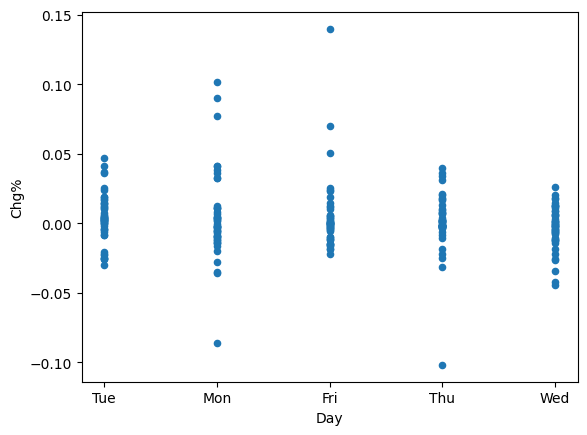

In [24]:
df_s.plot.scatter("Day", "Chg%")